<a href="https://colab.research.google.com/github/rakilkim/spotify-data-science/blob/main/Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS148 Final Project Appendix
# Shane O'Neill
# Shreya Thyagarajan
# Isabella Natarelli
# Annelise Escudero
# Rakil Kim

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from datascience import *
from plotly.subplots import make_subplots

#Load and print the data set
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

In [ ]:
df_clean1 = df.drop(["track_name","explicit","album_name","time_signature","loudness","track_id"],axis=1)
df_clean1.rename(columns={'Artist Name': 'artists','Popularity': 'popularity','Duration (in miliseconds)': 'duration_ms','Danceability': 'danceability','Energy':'energy','Key':'key','Mode':'mode'}, inplace=True)
df_clean1 = df_clean1.dropna()
df_clean1
# To start with the data cleaning, we removed columns that won't be important to our research. Names and ID numbers can't be graphed in a meaningful way, so we removed them.
# Also, we removed loudness, explicit, and time signature, since we agreed that these three variables are unimportant to our research, and if they even have any correlation,
# it would not be useful to us.

Unnamed: 0                 artists  popularity  duration_ms  \
0                0             Gen Hoshino          73       230666   
1                1            Ben Woodward          55       149610   
2                2  Ingrid Michaelson;ZAYN          57       210826   
3                3            Kina Grannis          71       201933   
4                4        Chord Overstreet          82       198853   
...            ...                     ...         ...          ...   
113995      113995           Rainy Lullaby          21       384999   
113996      113996           Rainy Lullaby          22       385000   
113997      113997           Cesária Evora          22       271466   
113998      113998        Michael W. Smith          41       283893   
113999      113999           Cesária Evora          22       241826   

        danceability  energy  key  mode  speechiness  acousticness  \
0              0.676  0.4610    1     0       0.1430        0.0322   
1              0.420  0.1660    1     1       0.0763        0.9240   
2              0.438  0.3590    0     1       0.0557        0.2100   
3              0.266  0.0596    0     1       0.0363        0.9050   
4              0.618  0.4430    2     1       0.0526        0.4690   
...              ...     ...  ...   ...          ...           ...   
113995         0.172  0.2350    5     1       0.0422        0.6400   
113996         0.174  0.1170    0     0       0.0401        0.9940   
113997         0.629  0.3290    0     0       0.0420        0.8670   
113998         0.587  0.5060    7     1       0.0297        0.3810   
113999         0.526  0.4870    1     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  track_genre  
0               0.000001    0.3580   0.7150   87.917     acoustic  
1               0.000006    0.1010   0.2670   77.489     acoustic  
2               0.000000    0.1170   0.1200   76.332     acoustic  
3               0.000071    0.1320   0.1430  181.740     acoustic  
4               0.000000    0.0829   0.1670  119.949     acoustic  
...                  ...       ...      ...      ...          ...  
113995          0.928000    0.0863   0.0339  125.995  world-music  
113996          0.976000    0.1050   0.0350   85.239  world-music  
113997          0.000000    0.0839   0.7430  132.378  world-music  
113998          0.000000    0.2700   0.4130  135.960  world-music  
113999          0.000000    0.0893   0.7080   79.198  world-music  

[113999 rows x 15 columns]

In [ ]:
%matplotlib inline

# Our exploratory data analysis
df_clean2 = df_clean1[df_clean1['popularity'] > 65]
fig1 = px.scatter(df_clean2, x="tempo", y="instrumentalness")
fig1.show()
fig2 = px.scatter(df_clean2, x="energy", y="liveness")
fig2.show()
fig3 = px.scatter(df_clean2, x="speechiness", y="energy")
fig3.show()
fig4 = px.scatter(df_clean1, x="danceability", y="popularity")
fig4.show()
fig5 = px.scatter(df_clean1, x="tempo", y="popularity")
fig5.show()
fig6 = px.scatter(df_clean1, x="energy", y="danceability", hover_name="artists")
fig6.show()


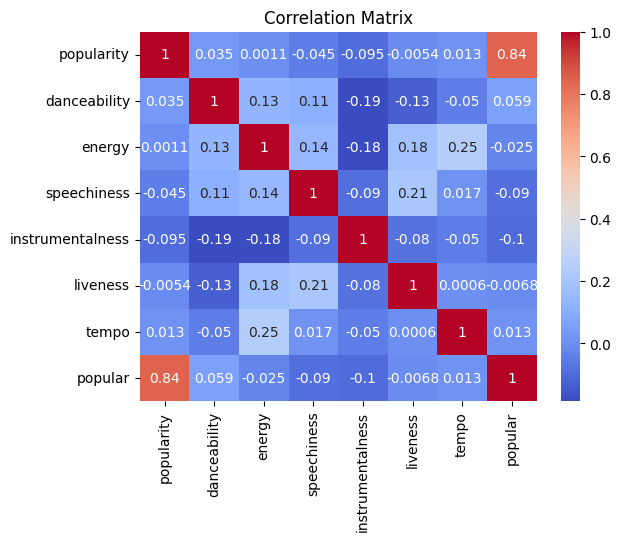

In [ ]:
# A screening map to see the correlations between different features to see patterns in the data to help determine which features to focus on
df_variables = df_clean1.drop(["Unnamed: 0","artists","duration_ms","key","mode","valence", "acousticness", "track_genre"],axis=1)
#px.imshow(df_variables)
corr_matrix = df_variables.corr()
plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# The original regression with all six features. The R^2 is very low. We will perform feature selection with LASSO.

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

df_clean1['popular'] = (df_clean1['popularity'] > 35).astype(int)
X = df_clean1[['energy', 'danceability', 'speechiness', 'tempo', 'liveness', 'instrumentalness']]
Y = df_clean1['popularity'].values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)

val_mse = mean_squared_error(Y_val, Y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)

print("Training MSE: " + str(train_mse) + ", RMSE: " + str(train_rmse) + ", MAE: " + str(train_mae) + ", R^2: " + str(train_r2))
print("Validation MSE: " + str(val_mse) + ", RMSE: " + str(val_rmse) + ", MAE: " + str(val_mae) + ", R^2: " + str(val_r2))

Training MSE: 491.269351247, RMSE: 22.1645967987, MAE: 18.5698075588, R^2: 0.013204834148690114
Validation MSE: 490.556240689, RMSE: 22.148504254, MAE: 18.5708823405, R^2: 0.011153699279204732


In [ ]:
from sklearn.linear_model import Lasso
# Initialize and fit the Lasso model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, Y_train)

# Create a DataFrame for the coefficients and match them with the feature names
coef_df = pd.DataFrame({
    'Feature': X.columns,  # Ensure this matches the original column names
    'Coefficient': lasso.coef_
})

# Print Lasso coefficients
print("Lasso Coefficients:")
print(coef_df)

# Liveness is near 0 and instrumentalness is highly negative.

Lasso Coefficients:
            Feature  Coefficient
0            energy    -0.393300
1      danceability     0.574013
2       speechiness    -1.233006
3             tempo     0.320783
4          liveness     0.082547
5  instrumentalness    -2.199965


In [ ]:
df_clean3 = df_clean1.drop(["liveness", "instrumentalness"],axis=1)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

X = df_clean3[['energy', 'danceability', 'speechiness', 'tempo']]
Y = df_clean3['popularity'].values
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_val_pred = model.predict(X_val)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)

val_mse = mean_squared_error(Y_val, Y_val_pred)
val_rmse = np.sqrt(val_mse)
val_mae = mean_absolute_error(Y_val, Y_val_pred)
val_r2 = r2_score(Y_val, Y_val_pred)

print("Training MSE: " + str(train_mse) + ", RMSE: " + str(train_rmse) + ", MAE: " + str(train_mae) + ", R^2: " + str(train_r2))
print("Validation MSE: " + str(val_mse) + ", RMSE: " + str(val_rmse) + ", MAE: " + str(val_mae) + ", R^2: " + str(val_r2))

Training MSE: 495.879280265, RMSE: 22.2683470483, MAE: 18.7532597266, R^2: 0.0039450346961205085
Validation MSE: 494.269161156, RMSE: 22.2321650128, MAE: 18.7408598559, R^2: 0.00366932263943498


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import confusion_matrix, make_scorer
import numpy as np


#re splitting the data using the popular column which has values of 1 or 0
X_log = df_clean3[['energy', 'danceability', 'speechiness', 'tempo']]
Y_log = df_clean3['popular'].values
X_train_log, X_val_log, Y_train_log, Y_val_log = train_test_split(X_log, Y_log, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_log = scaler.fit_transform(X_train_log)
X_val_log = scaler.fit_transform(X_val_log)

model = LogisticRegression()

# Define parameter grid
param_grid = {
    'C': [.0001 ,.001 ,0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],

}

# Use StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# GridSearchCV automatically performs cross validation
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1', # use f1-score since data is imbalanced
    cv=cv,
    n_jobs=-1
)
grid_search.fit(X_train_log, Y_train_log)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best F1-Score:", best_score)
print("Best model coefficients: ", best_model.coef_[0])


Best Parameters: {'C': 1, 'max_iter': 100}
Best F1-Score: 0.525323520405
Best model coefficients:  [-0.05536787  0.14972818 -0.21311773  0.05116537]


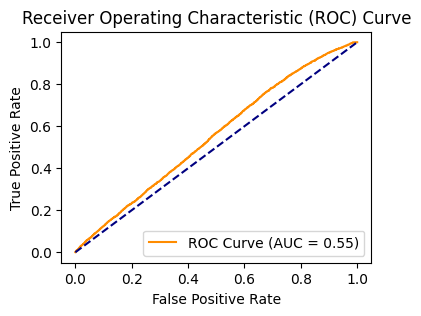

In [ ]:
# ROC Curve
y_prob_log = best_model.predict_proba(X_val_log)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_val_log, y_prob_log)
roc_auc = roc_auc_score(Y_val_log, y_prob_log)

plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
df_clean3['popular'] = (df_clean3['popularity'] > 35).astype(int)
X = df_clean3[['energy', 'danceability', 'speechiness', 'tempo']]
Y = df_clean3['popular'].values

# Split data into train and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Initialize and train the KNN classifier
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred = knn_1.predict(X_train_scaled)
Y_test_pred = knn_1.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy, 1 neighbor:", train_accuracy)
print("Testing Accuracy, 1 neighbor:", test_accuracy)

# Initialize and train the KNN classifier
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred = knn_2.predict(X_train_scaled)
Y_test_pred = knn_2.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy, 2 neighbors:", train_accuracy)
print("Testing Accuracy, 2 neighbors:", test_accuracy)

# Initialize and train the KNN classifier
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred = knn_5.predict(X_train_scaled)
Y_test_pred = knn_5.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy, 5 neighbors:", train_accuracy)
print("Testing Accuracy, 5 neighbors:", test_accuracy)

# Initialize and train the KNN classifier
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred = knn_15.predict(X_train_scaled)
Y_test_pred = knn_15.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy, 15 neighbors:", train_accuracy)
print("Testing Accuracy, 15 neighbors:", test_accuracy)

# Initialize and train the KNN classifier
knn_50 = KNeighborsClassifier(n_neighbors=50)
knn_50.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred = knn_50.predict(X_train_scaled)
Y_test_pred = knn_50.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy, 50 neighbors:", train_accuracy)
print("Testing Accuracy, 50 neighbors:", test_accuracy)

# Initialize and train the KNN classifier
knn_1000 = KNeighborsClassifier(n_neighbors=1000)
knn_1000.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred = knn_1000.predict(X_train_scaled)
Y_test_pred = knn_1000.predict(X_test_scaled)

# Evaluate the model
train_accuracy = accuracy_score(Y_train, Y_train_pred)
test_accuracy = accuracy_score(Y_test, Y_test_pred)

print("Training Accuracy, 1000 neighbors:", train_accuracy)
print("Testing Accuracy, 1000 neighbors:", test_accuracy)

Training Accuracy, 1 neighbor: 0.9910525334707617
Testing Accuracy, 1 neighbor: 0.6985964912280702
Training Accuracy, 2 neighbors: 0.8557440322810557
Testing Accuracy, 2 neighbors: 0.6483771929824561
Training Accuracy, 5 neighbors: 0.7648219826971787
Testing Accuracy, 5 neighbors: 0.6426315789473684
Training Accuracy, 15 neighbors: 0.6771455827366528
Testing Accuracy, 15 neighbors: 0.6158333333333333
Training Accuracy, 50 neighbors: 0.6304893694009803
Testing Accuracy, 50 neighbors: 0.6040350877192983
Training Accuracy, 1000 neighbors: 0.5846664985361681
Testing Accuracy, 1000 neighbors: 0.5785526315789473


In [ ]:
df_clean1['popular'] = (df_clean1['popularity'] > 35).astype(int)
print(df_clean1['popular'].value_counts())

popular
0    58450
1    55549
Name: count, dtype: int64


In [ ]:
from sklearn.model_selection import cross_val_score

threshold = 35  # Popularity greater than 35 is considered "popular"

# Create a new binary column 'popular' based on the threshold
df_clean1['popular'] = (df_clean1['popularity'] > threshold).astype(int)

X = df_clean1[['energy', 'danceability', 'speechiness', 'tempo']]
Y = df_clean1['popular']

# Split data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_classifier100 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier100.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred_rf100 = rf_classifier100.predict(X_train_scaled)
Y_test_pred_rf100 = rf_classifier100.predict(X_test_scaled)

# Evaluate the model
train_accuracy_rf100 = accuracy_score(Y_train, Y_train_pred_rf100)
test_accuracy_rf100 = accuracy_score(Y_test, Y_test_pred_rf100)

rf_classifier50 = RandomForestClassifier(n_estimators=50, random_state=42)
rf_classifier50.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred_rf50 = rf_classifier50.predict(X_train_scaled)
Y_test_pred_rf50 = rf_classifier50.predict(X_test_scaled)

# Evaluate the model
train_accuracy_rf50 = accuracy_score(Y_train, Y_train_pred_rf50)
test_accuracy_rf50 = accuracy_score(Y_test, Y_test_pred_rf50)

rf_classifier200 = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier200.fit(X_train_scaled, Y_train)

# Predictions
Y_train_pred_rf200 = rf_classifier200.predict(X_train_scaled)
Y_test_pred_rf200 = rf_classifier200.predict(X_test_scaled)

# Evaluate the model
train_accuracy_rf200 = accuracy_score(Y_train, Y_train_pred_rf200)
test_accuracy_rf200 = accuracy_score(Y_test, Y_test_pred_rf200)

cv_scores = cross_val_score(rf_classifier100, X, Y, cv=5, scoring='accuracy')
# Print cross-validation results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Cross-Validation Accuracy:", cv_scores.mean())
print("Standard Deviation of Cross-Validation Accuracy:", cv_scores.std())

print("Random Forest Training Accuracy n=100:", train_accuracy_rf100)
print("Random Forest Testing Accuracy n=100:", test_accuracy_rf100)
print("Random Forest Training Accuracy n=50:", train_accuracy_rf50)
print("Random Forest Testing Accuracy n=50:", test_accuracy_rf50)
print("Random Forest Training Accuracy n=200:", train_accuracy_rf200)
print("Random Forest Testing Accuracy n=200:", test_accuracy_rf200)

Cross-Validation Accuracy Scores: [ 0.65087719  0.68425439  0.65491228  0.65758772  0.61822887]
Mean Cross-Validation Accuracy: 0.653172089727
Standard Deviation of Cross-Validation Accuracy: 0.0210472343379
Random Forest Training Accuracy n=100: 0.9928507988026184
Random Forest Testing Accuracy n=100: 0.7252631578947368
Random Forest Training Accuracy n=50: 0.9928288687375958
Random Forest Testing Accuracy n=50: 0.7249122807017544
Random Forest Training Accuracy n=200: 0.9928507988026184
Random Forest Testing Accuracy n=200: 0.7255263157894737


In [ ]:
df = df.drop(df.sample(frac=0.5).index)
# Take a 50% sample of the data, otherwise silhouette scores are incredibly draining to run
df = df.drop(['Unnamed: 0', 'track_id','artists', 'album_name','track_genre'], axis = 1)
df = df.drop(['explicit','time_signature','mode','key','duration_ms','popularity'], axis = 1)

In [ ]:
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x: (x -min(x))/(max(x)-min(x)))
# Standardize the variables

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score
from sklearn.cluster import KMeans

ss = StandardScaler()
df_ss = ss.fit_transform(df.drop('track_name',axis=1))
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(df_ss)
kmeans3.cluster_centers_
#Apply k=3 clusters to the data

array([[-0.63008097, -1.42202276, -1.26452511, -0.26961938,  1.34869646,
         0.52102966, -0.20349342, -0.70063697, -0.40914251],
       [-0.51001778,  0.67358606,  0.4522154 ,  0.1065009 , -0.6430692 ,
         0.09675926,  0.37494026, -0.49368872,  0.45950027],
       [ 0.68600435,  0.18861067,  0.27708385,  0.05156779, -0.17574312,
        -0.32511085, -0.18056967,  0.70809865, -0.14371654]])

In [ ]:
print(round(kmeans3.inertia_, 1))
silhouette_score(df_ss, y_kmeans3)
# 3 KMeans score is 0.184

357901.9


0.16767842840951525

[[-0.63008097 -1.42202276 -1.26452511 -0.26961938  1.34869646  0.52102966
  -0.20349342 -0.70063697 -0.40914251]
 [-0.51001778  0.67358606  0.4522154   0.1065009  -0.6430692   0.09675926
   0.37494026 -0.49368872  0.45950027]
 [ 0.68600435  0.18861067  0.27708385  0.05156779 -0.17574312 -0.32511085
  -0.18056967  0.70809865 -0.14371654]]


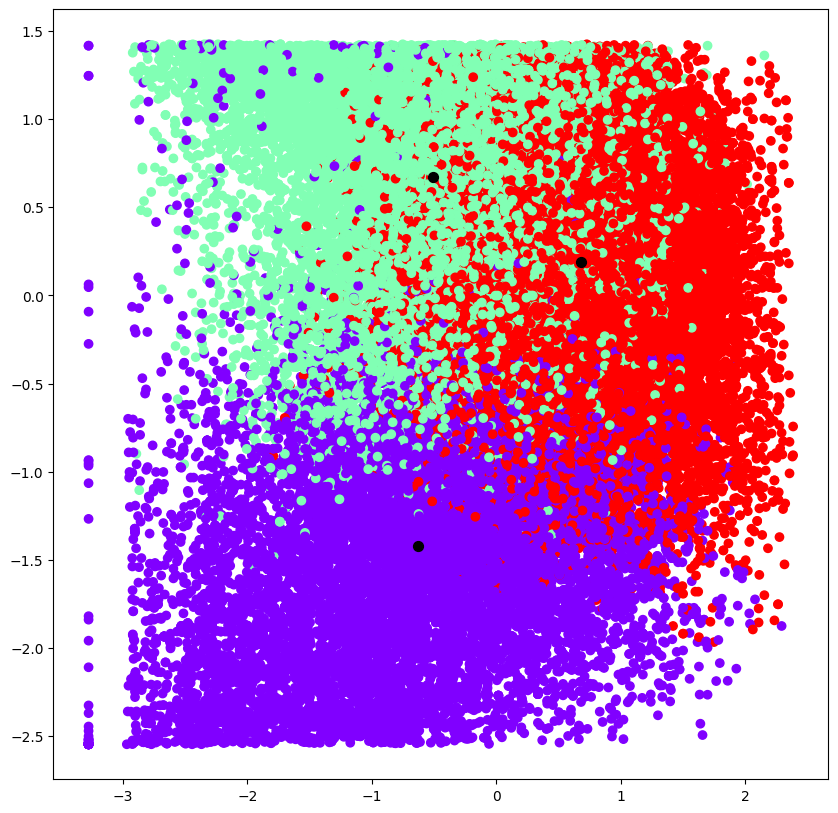

In [ ]:
centroids = kmeans3.cluster_centers_
print(centroids)

plt.figure(figsize=(10,10))
plt.scatter(df_ss[:,0], df_ss[:,1], c = y_kmeans3, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
plt.show()
#Plot the clusters for k=3

In [ ]:
kmeans4 = KMeans(n_clusters=4)
y_kmeans4 = kmeans4.fit_predict(df_ss)
kmeans4.cluster_centers_
round(kmeans4.inertia_, 1)
print(silhouette_score(df_ss, y_kmeans4))
#Check silhouette score for k=4

0.187873624805


In [ ]:
kmeans2 = KMeans(n_clusters=2)
y_kmeans2 = kmeans2.fit_predict(df_ss)
kmeans2.cluster_centers_
round(kmeans2.inertia_, 1)
print(silhouette_score(df_ss, y_kmeans2))
#Check score for k=2

0.263325804287


In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(df_ss)
kmeans5.cluster_centers_
round(kmeans5.inertia_, 1)
print(silhouette_score(df_ss, y_kmeans5))
#Check score for k=5

0.178734858013


In [ ]:
kmeans6 = KMeans(n_clusters=6)
y_kmeans6 = kmeans6.fit_predict(df_ss)
kmeans6.cluster_centers_
round(kmeans6.inertia_, 1)
print(silhouette_score(df_ss, y_kmeans6))
#Check score for k=6

0.190715251681


In [ ]:
kmeans7 = KMeans(n_clusters=7)
y_kmeans7 = kmeans7.fit_predict(df_ss)
kmeans7.cluster_centers_
round(kmeans7.inertia_, 1)
print(silhouette_score(df_ss, y_kmeans7))
#Check score for k=7

0.198696499341


In [ ]:
kmeans8 = KMeans(n_clusters=8)
y_kmeans8 = kmeans8.fit_predict(df_ss)
kmeans8.cluster_centers_
round(kmeans8.inertia_, 1)
print(silhouette_score(df_ss, y_kmeans8))
#Check score for k=8

0.178996863124


In [ ]:
kmeans9 = KMeans(n_clusters=9)
y_kmeans9 = kmeans9.fit_predict(df_ss)
kmeans9.cluster_centers_
round(kmeans9.inertia_, 1)
print(silhouette_score(df_ss, y_kmeans9))
#Check score for k=9

0.180368565827


[[ 0.18086144  0.44011831  0.38294946  0.08169473 -0.42079382 -0.15080671
   0.06149558  0.20124563  0.13016103]
 [-0.54785151 -1.3331724  -1.16000093 -0.24746336  1.27463614  0.45681205
  -0.18627766 -0.60959773 -0.39427373]]


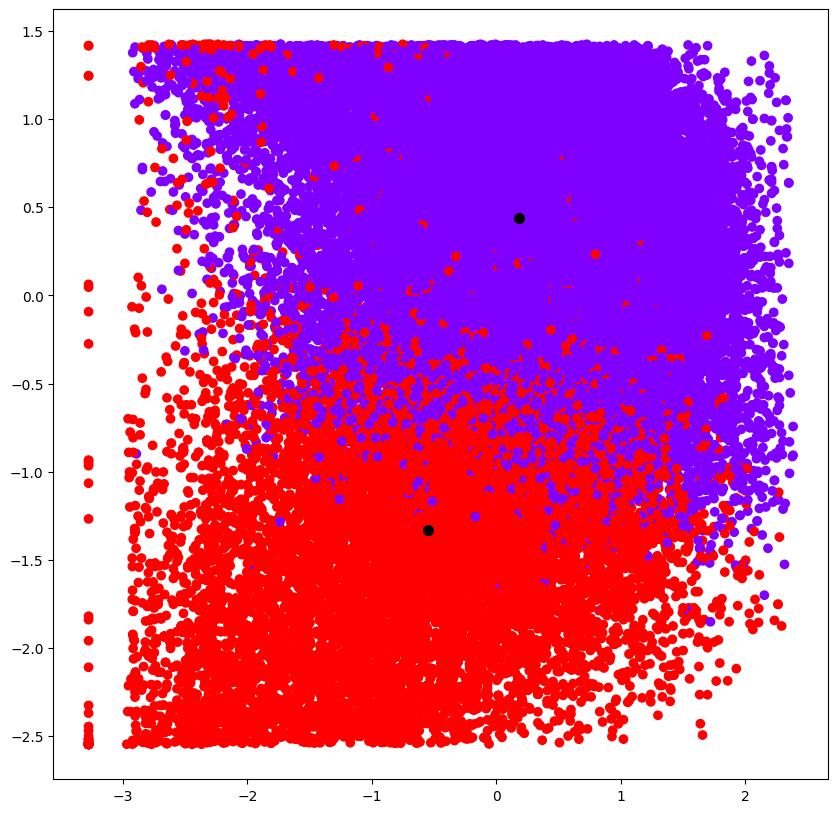

In [ ]:
centroids = kmeans2.cluster_centers_
print(centroids)

plt.figure(figsize=(10,10))
plt.scatter(df_ss[:,0], df_ss[:,1], c = y_kmeans2, cmap='rainbow')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=50)
plt.show()
#Plot lowest silhouette score, k=2

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_train_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Create a scree plot using plotly
fig = px.line(
    x=np.arange(1, len(explained_variance) + 1),  # Principal component numbers (1-based index)
    y=explained_variance,
    labels={"x": "Principal Component", "y": "Proportion of Variance Explained"},
    title="Scree Plot"
)

fig.update_yaxes(range=[0, 1])
fig.show()


<ipython-input-83-6c728c83580d>:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



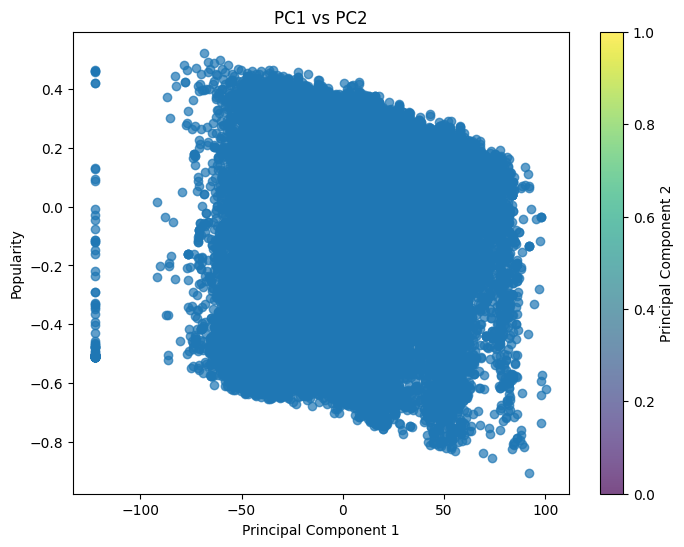

In [ ]:

pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_train)

# Create a DataFrame with the PC's
pca_df = pd.DataFrame(X_pca_2d, columns=['PC1', 'PC2'])
pca_df['popularity'] = df_clean1['popularity']  # Assuming 'popularity' is your target

# Scatterplot of the PC1 vs popularity
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], cmap='viridis', alpha=0.7)
plt.title('PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Popularity')
plt.colorbar(label='Principal Component 2')
plt.show()

<ipython-input-84-5bd19cf70c7a>:10: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



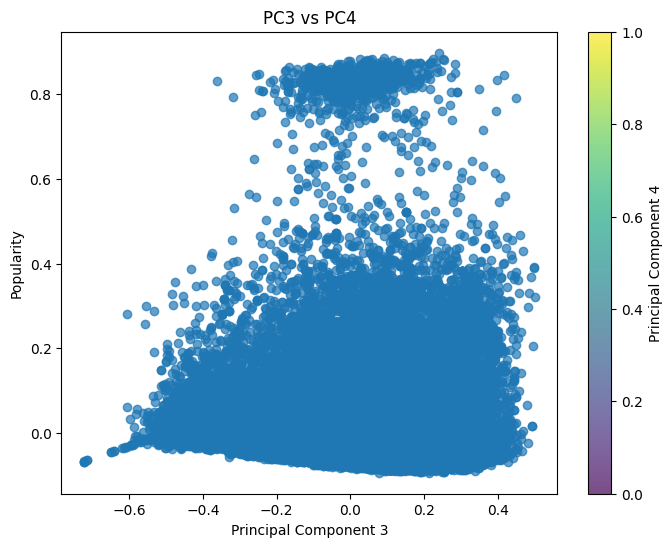

In [ ]:

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_train)

# DataFrame with the first four PC's
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['popularity'] = df_clean1['popularity']  # Assuming 'popularity' is your target

# Scatterplot of PC1 vs popularity
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC3'], pca_df['PC4'], cmap='viridis', alpha=0.7)
plt.title('PC3 vs PC4')
plt.xlabel('Principal Component 3')
plt.ylabel('Popularity')
plt.colorbar(label='Principal Component 4')
plt.show()

<ipython-input-85-70fee4a4a409>:3: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



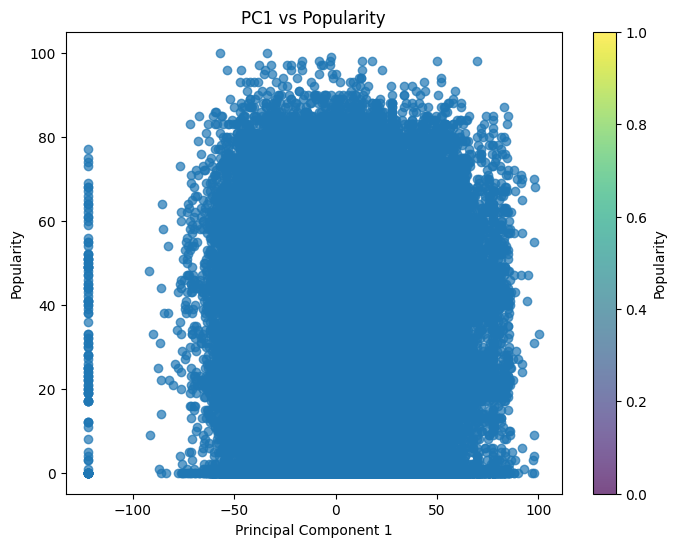

<ipython-input-85-70fee4a4a409>:12: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



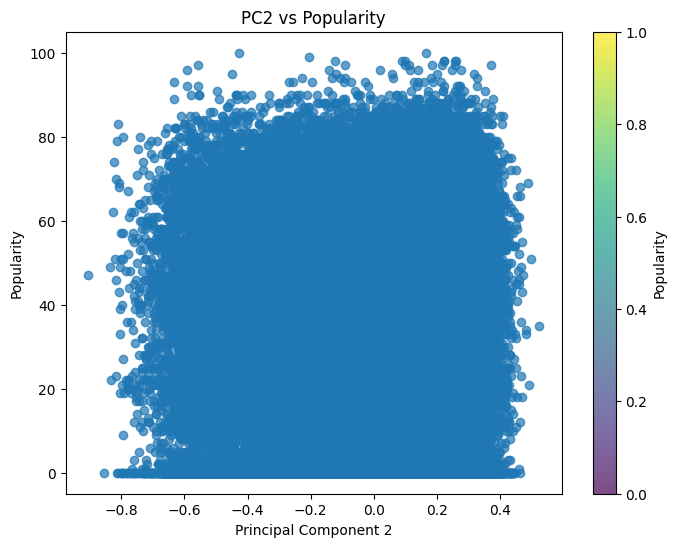

In [ ]:
# Scatterplot of the PC1 vs popularity
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['popularity'], cmap='viridis', alpha=0.7)
plt.title('PC1 vs Popularity')
plt.xlabel('Principal Component 1')
plt.ylabel('Popularity')
plt.colorbar(label='Popularity')
plt.show()

# Scatterplot of the PC2 vs popularity
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC2'], pca_df['popularity'], cmap='plasma', alpha=0.7)
plt.title('PC2 vs Popularity')
plt.xlabel('Principal Component 2')
plt.ylabel('Popularity')
plt.colorbar(label='Popularity')
plt.show()

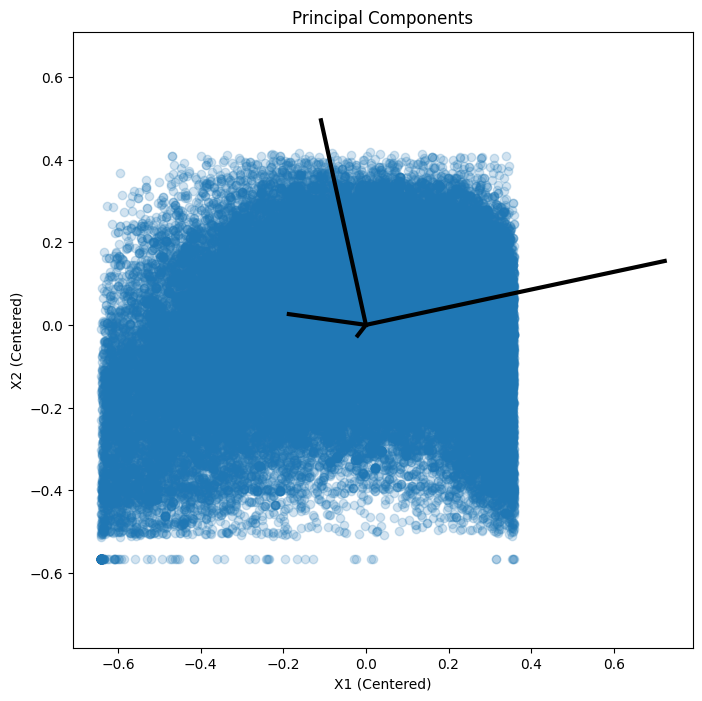

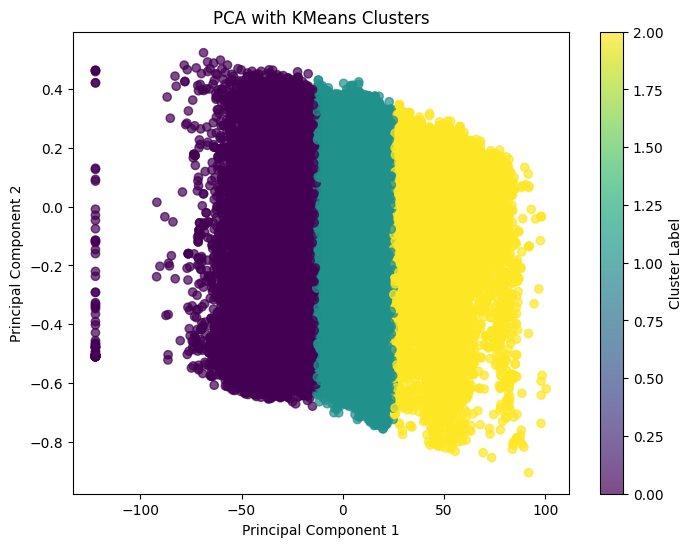

In [ ]:
# Visualizing PC's with eigenvectors
cov_matrix = np.cov(X_train.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
X_centered = X_train.to_numpy() - np.mean(X_train.to_numpy(), axis=0)

plt.figure(figsize=(8, 8))
plt.scatter(X_centered[:, 0], X_centered[:, 1], alpha=0.2)
for length, vector in zip(eigenvalues, eigenvectors.T):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', linewidth=3)
plt.title('Principal Components')
plt.xlabel('X1 (Centered)')
plt.ylabel('X2 (Centered)')
plt.axis('equal')
plt.show()

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca_2d)

# Scatterplot of PCA components with KMeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=clusters, cmap='viridis', alpha=0.7)
plt.title('PCA with KMeans Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


Epoch 10/100, Loss: 0.1502
Epoch 20/100, Loss: 0.0921
Epoch 30/100, Loss: 0.0594
Epoch 40/100, Loss: 0.0537
Epoch 50/100, Loss: 0.0524
Epoch 60/100, Loss: 0.0513
Epoch 70/100, Loss: 0.0511
Epoch 80/100, Loss: 0.0505
Epoch 90/100, Loss: 0.0502
Epoch 100/100, Loss: 0.0499


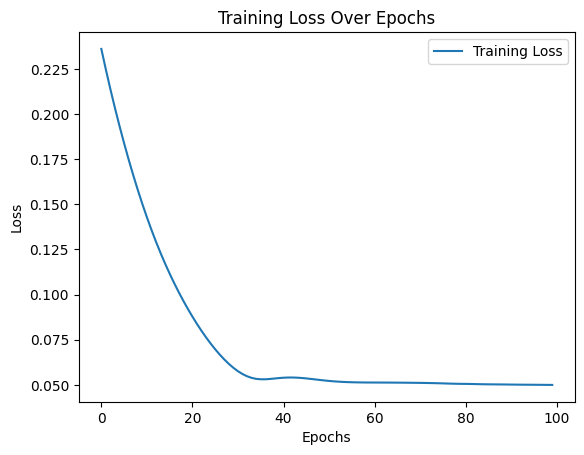

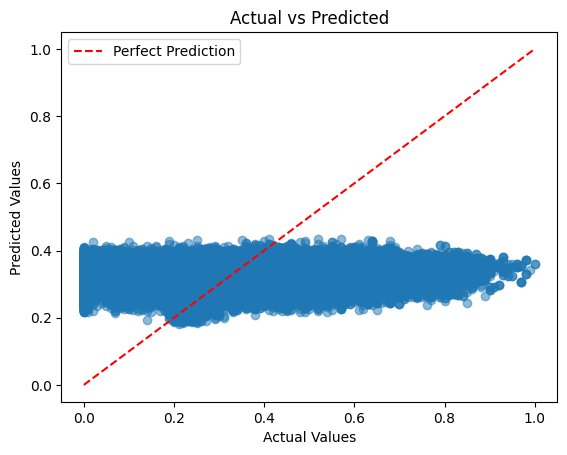

In [ ]:
#!pip uninstall torch torchvision torchaudio -y
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

# Load and preprocess the Spotify dataset
# Load the dataset (replace the toy dataset with Spotify dataset)
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

# Select relevant columns for the input features and target variable
# features = ['danceability']
features = ['danceability', 'energy', 'speechiness', 'tempo']  # Added more features
df = df[['popularity'] + features]

# Normalize input feature (danceability) to range between 0 and 1
df[features] = df[features].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Normalize target variable (popularity) to range between 0 and 1
df['popularity'] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())

# Separate input feature (X) and target variable (y)
# X_train = df['danceability'].values.reshape(-1, 1)
# y_train = df['popularity'].values.reshape(-1, 1)
X_train = df[features].values
y_train = df['popularity'].values.reshape(-1, 1)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

# Define the simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.hidden = nn.Linear(len(features), 10)  # First hidden layer with 10 neurons
        self.relu = nn.ReLU()                       # Activation function for non-linearity
        self.output = nn.Linear(10, 1)              # Output layer

    def forward(self, x):
        x = self.hidden(x)
        x = self.relu(x)
        x = self.output(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

# Training the model
num_epochs = 100
train_loss_history = []

for epoch in range(num_epochs):
    model.train()
    # Forward pass
    predictions = model(X_train)
    loss = criterion(predictions, y_train)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Record epoch loss
    train_loss_history.append(loss.item())

    # Print loss every 10 epochs
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item():.4f}")

# Evaluate the model
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).numpy()

# Plot training loss
plt.plot(range(len(train_loss_history)), train_loss_history, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Plot Actual vs Predicted
plt.scatter(y_train.numpy(), y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


In [ ]:
##Classification step of NN

# Define a threshold for classification
popularity_threshold = 0.35  # Adjust this value based on your requirements

# Function to classify popularity
def classify_popularity(predicted_popularity, threshold):
    return ["Popular" if val > threshold else "Not Popular" for val in predicted_popularity]

# Evaluate the model and classify
model.eval()
with torch.no_grad():
    y_train_pred = model(X_train).numpy()  # Predicted popularity
    y_train_pred = y_train_pred.flatten()  # Flatten the array to 1D
    y_train_pred_classified = classify_popularity(y_train_pred, popularity_threshold)

print("Example Predictions:")
for actual, predicted, classification in zip(y_train.numpy().flatten()[:10], y_train_pred[:10], y_train_pred_classified[:10]):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}, Classified: {classification}")


Example Predictions:
Actual: 0.73, Predicted: 0.32, Classified: Not Popular
Actual: 0.55, Predicted: 0.29, Classified: Not Popular
Actual: 0.57, Predicted: 0.29, Classified: Not Popular
Actual: 0.71, Predicted: 0.36, Classified: Popular
Actual: 0.82, Predicted: 0.35, Classified: Not Popular
Actual: 0.58, Predicted: 0.33, Classified: Not Popular
Actual: 0.74, Predicted: 0.35, Classified: Popular
Actual: 0.80, Predicted: 0.39, Classified: Popular
Actual: 0.74, Predicted: 0.36, Classified: Popular
Actual: 0.56, Predicted: 0.30, Classified: Not Popular
